# PCA using library implementation
Here, we use Principal Component Analysis (or dimensionality reduction) for feature selection. 

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Importing dataset     
df = pd.read_csv( "../ML-Project-CS361/cleaned_shifted_data.csv" ) 
drop_cols = [0,1,2,12,14,16]
drop_cols = df.columns[drop_cols]
drop_cols

Index(['Timestamp', 'Unnamed: 0', 'Station', 'Checks', 'AQI_bucket_calculated',
       'AQI_bucket_calculated_shifted'],
      dtype='object')

In [4]:
# Drop the columns and make a new dataframe df1
df.drop(columns=drop_cols, inplace=True)

In [5]:
print(df.shape)

(174762, 11)


In [6]:
X = df.values #convertind pandas df to np array

In [7]:
# Step 1: Standardize the Data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-0.2284613 , -0.27947897, -0.40159894, ..., -0.37032615,
        -0.70256623,  1.49358304],
       [-0.2284613 , -0.27947897, -0.38000926, ..., -0.38256664,
        -0.69301701,  1.50309952],
       [-0.23480768, -0.2801947 , -0.37377224, ..., -0.39087269,
        -0.69301701,  1.51261601],
       ...,
       [ 0.18906354,  0.02470543, -0.16123382, ...,  1.86356376,
         1.01629424,  0.76081353],
       [ 0.22246553,  0.02470543, -0.16123382, ...,  0.88869596,
         0.93035122,  0.77033001],
       [ 0.17236255,  1.06251102, -0.16123382, ...,  0.53459599,
         0.82530974,  0.77033001]])

In [13]:
# Step 2-5: PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_std)
X_pca

array([[ 0.11883616, -0.68690043, -1.82520905, ..., -1.54910951,
         0.46415058,  0.99216834],
       [ 0.21938965, -0.74705203, -2.05725703, ..., -1.6321302 ,
         0.68923659,  1.08386959],
       [ 0.15414982, -0.71318553, -1.8909654 , ..., -1.584287  ,
         0.57380765,  1.02555231],
       ...,
       [ 0.14305688, -0.99481074,  2.44098014, ..., -0.7938001 ,
         0.79151966,  0.05019637],
       [ 0.34358643, -1.12325336, -0.0502625 , ...,  0.07834068,
        -0.48145495, -0.14575719],
       [ 0.74821492, -1.23292794, -0.09906858, ...,  0.42046892,
        -0.66857962, -0.50823707]])

In [14]:
print(X_pca.shape)

(174762, 8)


In [15]:
# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

In [24]:
# check explained variance
print(f"Explained variance: {cumulative_var_ratio[7]:.4f}")

Explained variance: 0.9557


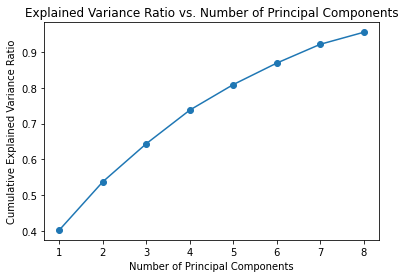

In [16]:
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()